# Part II - (Ford GoBike System Data Exploration)
## by (Takalani Mbooi)


## Investigation Overview


> In this investigation, I want to check which kind of people had more duration of riding bikes. 


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Rows with missing values on variables of member_birth_year and member_gender were dropped from a dataset.

## Key Insights 

> Distribution of the main variable of interest: duration_sec.
> Counts of the participants per birth year.
> Looking at the durations of user type and member gender.
> Relationships between three categorical features (user_type, member_gender, and member_birth_year).
> Relationship between bike share for all trip, member gender, and member birth year.
> Relationship between user_type and member gender to the duration.
> Relationship between member birth year, member gender, and the duration.
> Correlation between user_type, member_gether, member_birth_year to the duration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
GoBike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(GoBike.shape)
print(GoBike.dtypes)
print(GoBike.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
GoBike.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
# descriptive statistics for numeric variables
print(GoBike.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [6]:
# Data wrangling. Check for missing values
GoBike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# Drop rows with missing values
GoBike = GoBike.dropna()

## Distribution of duration

There is a long tail in the distribution of duration spent on bikes, I then used a log scale. Duration_sec has a long-tailed distribution, with a lot of seconds on the low duration end (less than 10 000 sec), and few on the high duration end. When plotted on a log-scale, the duration_sec distribution was skewed to the right, with a peak around 500 seconds.

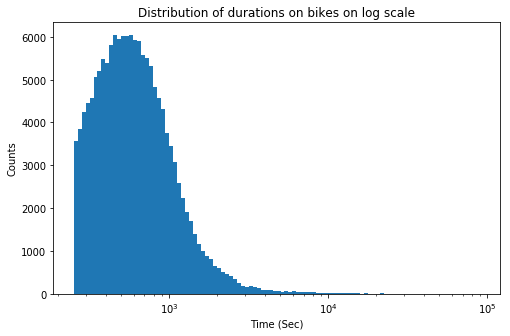

In [8]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(GoBike['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = GoBike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.title('Distribution of durations on bikes on log scale')
plt.ylabel('Counts')
plt.xlabel('Time (Sec)')
plt.show()

## Counts of Member birth year

Most of the participants were born in 1988, followed by those who were born in 1993, the age group between 1986 and 1995 is the dominant group,the counts decreases as we move left and right from the dominant group. 

 

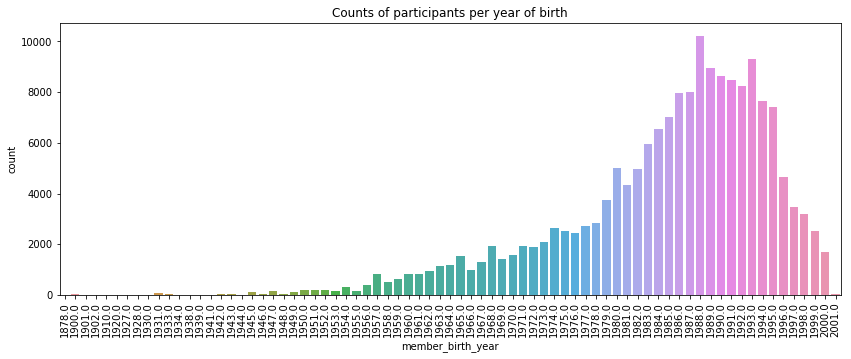

In [9]:
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.figure(figsize=[14, 5])
sb.countplot(data=GoBike, x='member_birth_year');
plt.title('Counts of participants per year of birth');
plt.xticks(rotation=90);

## (Relationships between the three categorical features (Member birth year, member gender, and user type))

In all gender types there are more subscribers than customers. The dominant gender is male.People who rented bikes more were born in the year 1988. There were more males who hired bikes than combined females and other gender.

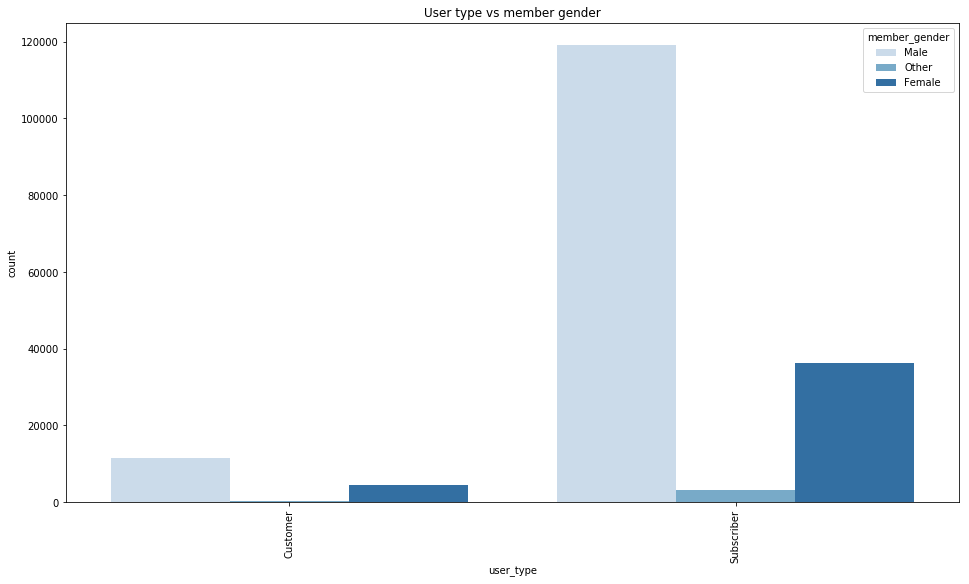

In [10]:
# Looking at relationships between the three categorical features

plt.figure(figsize = [16, 30])

# subplot 1: user_type vs member_gender
plt.subplot(3, 1, 1)
plt.title('User type vs member gender')
sb.countplot(data = GoBike, x = 'user_type', hue = 'member_gender', palette = 'Blues')
plt.xticks(rotation=90);



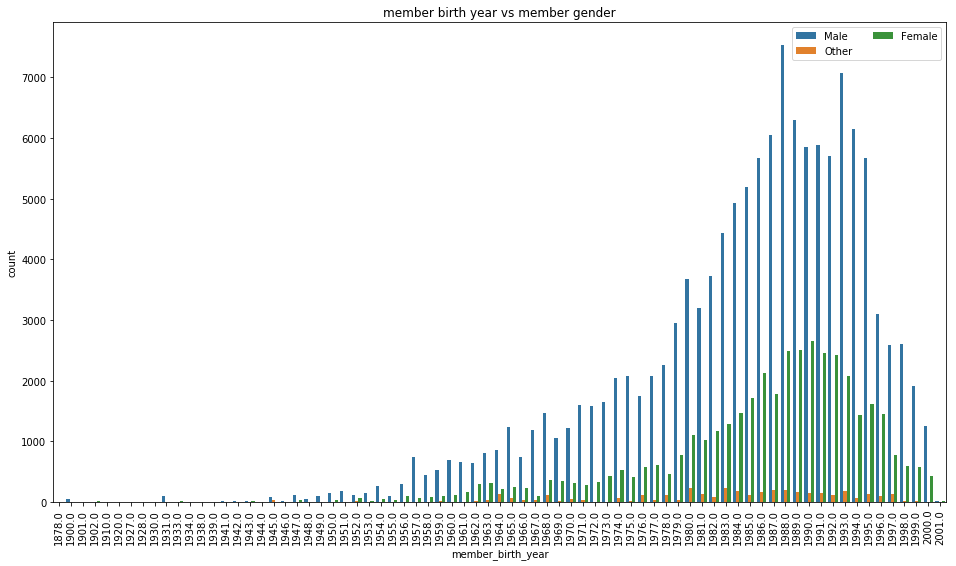

In [11]:
plt.figure(figsize = [16, 30])

# subplot 2: member_birth_year vs. member_gender
ax = plt.subplot(3, 1, 2)
plt.title('member birth year vs member gender')
sb.countplot(data = GoBike, x = 'member_birth_year', hue = 'member_gender') # Default colours
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=90);



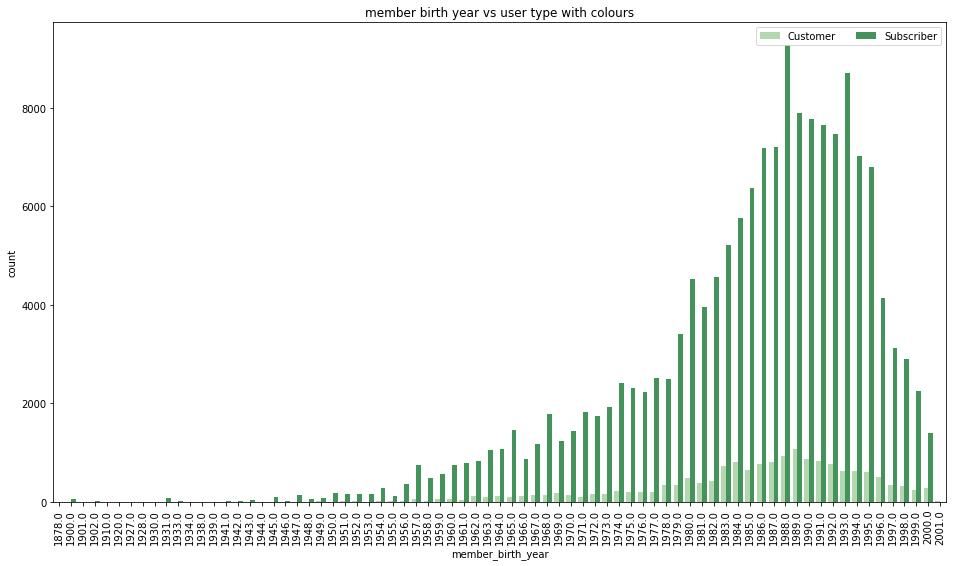

In [12]:
plt.figure(figsize = [16, 30])

# subplot 3: member_birth_year vs. user type, use different color palette
ax = plt.subplot(3, 1, 3)
plt.title('member birth year vs user type with colours')
sb.countplot(data = GoBike, x = 'member_birth_year', hue = 'user_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.xticks(rotation=90);
plt.show()

## (Pointplot of member birth year vs duration_sec vs member gender)
Looking at the point plot for people who were born before 1965, their mean duration for different genders varies by a big gap, and for the male, female and other gender who were born after 1965 their mean duration were similar and they had few outliers.


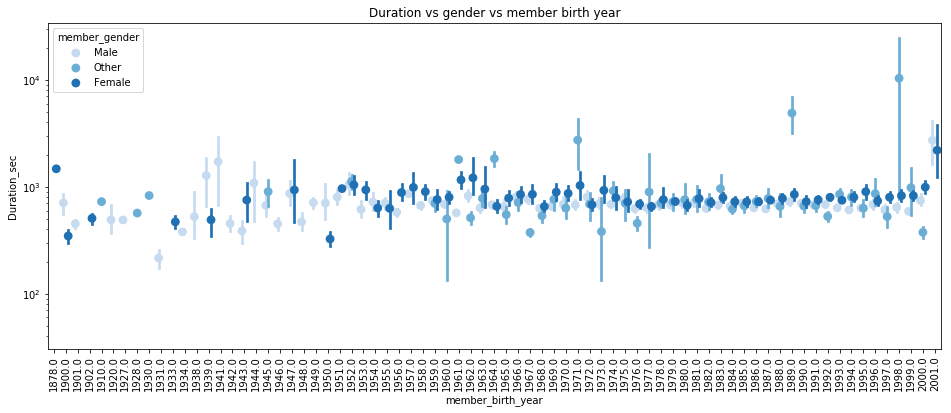

In [13]:
fig = plt.figure(figsize = [16,6])
ax = sb.pointplot(data = GoBike, x = 'member_birth_year', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks(rotation=90);
plt.title('Duration vs gender vs member birth year')
plt.ylabel('Duration_sec')
plt.yscale('log')
ax.set_yticklabels([],minor = True)
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 284406 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/